Statevector (before measurement):
Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
Statevector probabilities: [0.  0.5 0.  0.  0.  0.  0.  0.5]

Circuit:
     ┌───┐     
q_0: ┤ X ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘

Measurement results: {'111': 46, '001': 54}


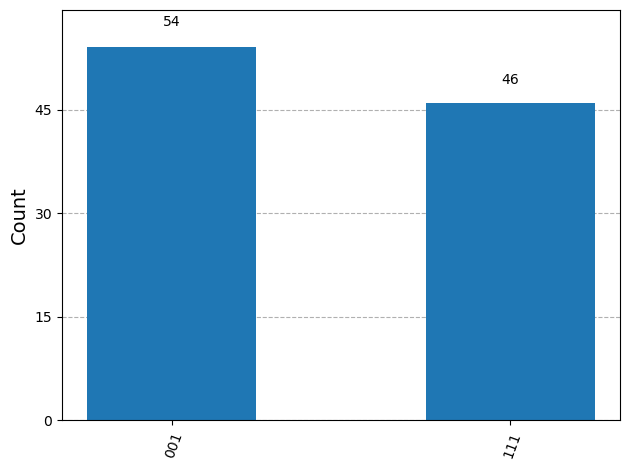

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

# Create a quantum circuit with one qubit
qc = QuantumCircuit(3)
# qc.x(0)
# qc.x(1)
qc.x(0)
qc.h(1)
# qc.x(2)
# Apply the Toffoli gate, where qubits 0 and 1 are the control qubits and qubit 2 is the target qubit
qc.ccx(0, 1, 2)

# Get the statevector BEFORE measurement
state = Statevector(qc)
print("Statevector (before measurement):")
print(state)
print(f"Statevector probabilities: {state.probabilities()}")

# Visualize the circuit
print("\nCircuit:")
print(qc)

# Now create a copy for measurement
qc_measured = qc.copy()
qc_measured.measure_all()

simulator = AerSimulator()
# Simulate the circuit with measurements
job = simulator.run(qc_measured, shots=100)

# Get the result
result = job.result()

# Print the counts
print(f"\nMeasurement results: {result.get_counts(qc_measured)}")

# Visualize the measurement outcomes
plot_histogram(result.get_counts(qc_measured))

# 📚 Como Ler um Statevector

## 🔍 **Interpretação do Statevector**

Um Statevector representa o estado quântico de um sistema de múltiplos qubits. Para um sistema de **n qubits**, temos **2^n** estados possíveis.

### 📊 **Formato do Statevector**
```
Statevector([a₀, a₁, a₂, a₃, a₄, a₅, a₆, a₇])
```

Cada coeficiente `aᵢ` representa a amplitude de probabilidade para o estado base `|i⟩` em notação binária:

- `a₀` → `|000⟩` (qubit 2, qubit 1, qubit 0)
- `a₁` → `|001⟩` 
- `a₂` → `|010⟩`
- `a₃` → `|011⟩`
- `a₄` → `|100⟩`
- `a₅` → `|101⟩`
- `a₆` → `|110⟩`
- `a₇` → `|111⟩`

### 🧮 **Probabilidades**
A probabilidade de medir o estado `|i⟩` é `|aᵢ|²`

### 🎯 **Exemplo Prático**
Se o Statevector for `[0, 0.707, 0, 0.707, 0, 0, 0, 0]`:
- `|001⟩` tem probabilidade `|0.707|² = 0.5` (50%)
- `|011⟩` tem probabilidade `|0.707|² = 0.5` (50%)
- Todos os outros estados têm probabilidade 0


In [10]:
# 🔍 Análise Detalhada do Statevector

# Vamos analisar o statevector do seu circuito Toffoli
print("=== ANÁLISE DO STATEVECTOR ===")
print(f"Statevector: {state}")
print(f"Tipo: {type(state)}")
print(f"Dimensão: {state.dim}")

# Converter para array numpy para análise mais fácil
import numpy as np
state_array = np.array(state.data)
print(f"\nArray numpy: {state_array}")

# Calcular probabilidades manualmente
probabilities = np.abs(state_array)**2
print(f"\nProbabilidades calculadas: {probabilities}")

# Encontrar estados com probabilidade não-zero
nonzero_indices = np.where(probabilities > 1e-10)[0]
print(f"\nEstados com probabilidade > 0:")
for i in nonzero_indices:
    binary_state = format(i, '03b')  # 3 bits para 3 qubits
    prob = probabilities[i]
    amplitude = state_array[i]
    print(f"  |{binary_state}⟩: amplitude = {amplitude:.6f}, probabilidade = {prob:.6f}")

# Verificar se as probabilidades somam 1
total_prob = np.sum(probabilities)
print(f"\nSoma das probabilidades: {total_prob:.6f} (deve ser ≈ 1.0)")

# Explicação do que significa cada estado
print(f"\n=== INTERPRETAÇÃO ===")
print("Estados em notação binária (qubit2, qubit1, qubit0):")
for i in nonzero_indices:
    binary_state = format(i, '03b')
    prob = probabilities[i]
    print(f"  |{binary_state}⟩ = |q2={binary_state[0]}, q1={binary_state[1]}, q0={binary_state[2]}⟩ → {prob:.1%}")


=== ANÁLISE DO STATEVECTOR ===
Statevector: Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
Tipo: <class 'qiskit.quantum_info.states.statevector.Statevector'>
Dimensão: 8

Array numpy: [0.        +0.j 0.70710678+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Probabilidades calculadas: [0.  0.5 0.  0.  0.  0.  0.  0.5]

Estados com probabilidade > 0:
  |001⟩: amplitude = 0.707107+0.000000j, probabilidade = 0.500000
  |111⟩: amplitude = 0.707107+0.000000j, probabilidade = 0.500000

Soma das probabilidades: 1.000000 (deve ser ≈ 1.0)

=== INTERPRETAÇÃO ===
Estados em notação binária (qubit2, qubit1, qubit0):
  |001⟩ = |q2=0, q1=0, q0=1⟩ → 50.0%
  |111⟩ = |q2=1, q1=1, q0=1⟩ → 50.0%


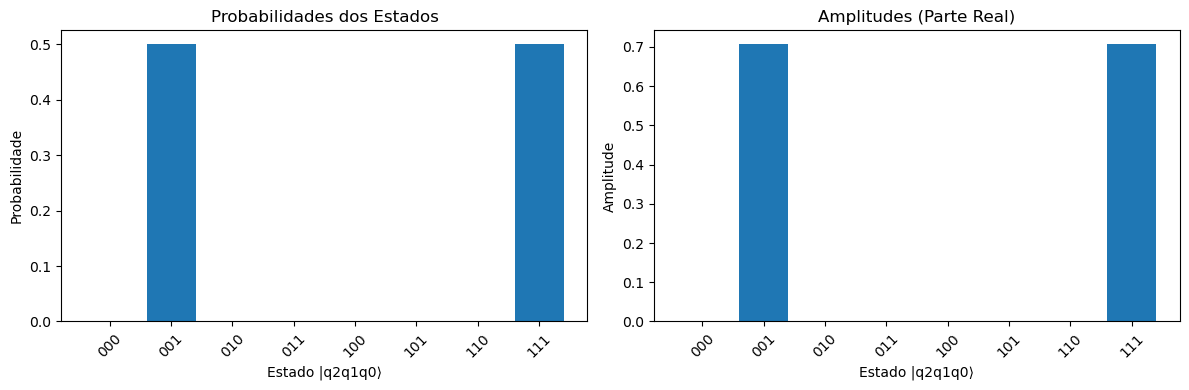


=== VISUALIZAÇÃO 3D ===

=== RESUMO ===
O circuito Toffoli com entrada |010⟩ produz:
  • Estado |001⟩ com probabilidade 50.0%
  • Estado |111⟩ com probabilidade 50.0%

Isso significa que quando você medir os 3 qubits, você obterá:
  • 50.0% de chance de obter: q2=0, q1=0, q0=1
  • 50.0% de chance de obter: q2=1, q1=1, q0=1


In [11]:
# 📊 Visualizações do Statevector

import matplotlib.pyplot as plt

# 1. Gráfico de barras das probabilidades
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
states = [format(i, '03b') for i in range(8)]
plt.bar(states, probabilities)
plt.title('Probabilidades dos Estados')
plt.xlabel('Estado |q2q1q0⟩')
plt.ylabel('Probabilidade')
plt.xticks(rotation=45)

# 2. Gráfico de barras das amplitudes (parte real)
plt.subplot(1, 2, 2)
amplitudes_real = np.real(state_array)
plt.bar(states, amplitudes_real)
plt.title('Amplitudes (Parte Real)')
plt.xlabel('Estado |q2q1q0⟩')
plt.ylabel('Amplitude')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Visualização usando plot_state_city
print("\n=== VISUALIZAÇÃO 3D ===")
plot_state_city(state, title="Statevector 3D Visualization")

# 4. Resumo em texto
print(f"\n=== RESUMO ===")
print(f"O circuito Toffoli com entrada |{format(2, '03b')}⟩ produz:")
for i in nonzero_indices:
    binary_state = format(i, '03b')
    prob = probabilities[i]
    print(f"  • Estado |{binary_state}⟩ com probabilidade {prob:.1%}")

print(f"\nIsso significa que quando você medir os 3 qubits, você obterá:")
for i in nonzero_indices:
    binary_state = format(i, '03b')
    prob = probabilities[i]
    print(f"  • {prob:.1%} de chance de obter: q2={binary_state[0]}, q1={binary_state[1]}, q0={binary_state[2]}")
